In [ ]:
%load_ext autoreload

%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.methods.CAA_class import _CAA
from src.methods.OAA_class import _OAA
from src.methods.RBOAA_class import _RBOAA

from src.utils.synthetic_data_class import _synthetic_data
from src.utils.synthetic_data_naive import synthetic_data_naive

from src.utils.eval_measures import NMI, MCC

In [ ]:
data = pd.read_csv("C:/Users/aejew/OneDrive - Danmarks Tekniske Universitet\Dokumenter\GitHub\RBOAA\ESS8.csv")
data.head()

,ID,Country,left_right,immigrants,homosexual,Satisfy_life,Satisfy_health,Attitude2EU,gender,age,...,PO_CFA,AC_CFA,UN_CFA,BE_CFA,SBM8,SBM9,SBM16,LCA5,LCA8,LCA16
0,1,AT,0,10,1,5,5,5,2,34,...,-0.47,0.46,0.34,0.52,1,7,14,2,3,8
1,2,AT,1,5,1,5,3,10,1,52,...,-0.59,-0.30,-0.50,-0.57,3,6,2,1,2,4
2,4,AT,5,4,1,9,6,0,2,68,...,-0.93,-1.16,0.06,0.14,5,4,1,3,5,10
3,6,AT,0,10,3,7,6,7,1,54,...,0.45,0.66,-0.11,-0.14,2,3,15,4,6,9
4,10,AT,5,5,1,10,10,8,2,20,...,-0.30,-0.12,0.39,0.72,1,7,8,2,3,14


In [90]:
data.Country.value_counts()

Country
DE    2747
IE    2652
IT    2334
CZ    2176
IL    2160
RU    2090
EE    1986
FR    1962
AT    1906
GB    1897
LT    1873
FI    1859
BE    1743
ES    1737
NL    1602
PL    1540
NO    1510
SE    1441
CH    1430
HU    1416
SI    1227
PT    1217
IS     788
Name: count, dtype: int64

In [91]:
data[data.Country == "GB"]

,ID,Country,left_right,immigrants,homosexual,Satisfy_life,Satisfy_health,Attitude2EU,gender,age,...,PO_CFA,AC_CFA,UN_CFA,BE_CFA,SBM8,SBM9,SBM16,LCA5,LCA8,LCA16
17546,100000001,GB,8,2,2,10,0,6,1,53,...,0.47,0.44,0.05,0.34,2,3,11,5,6,15
17547,100000002,GB,1,77,1,7,5,0,1,60,...,-0.38,-0.12,0.15,-0.07,8,9,13,2,4,9
17548,100000003,GB,5,5,2,10,7,5,2,54,...,0.32,0.53,0.63,0.67,7,3,3,5,8,15
17549,100000005,GB,0,1,2,8,0,5,2,52,...,0.26,0.35,0.07,0.09,2,3,13,4,6,9
17550,100000006,GB,3,5,1,6,4,5,1,28,...,0.66,0.73,-0.37,-0.14,6,2,15,4,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19438,100004992,GB,5,4,2,8,3,5,1,60,...,1.08,1.32,0.43,0.57,7,1,12,5,8,16
19439,100004993,GB,4,6,1,5,6,3,1,53,...,-0.41,-0.38,-0.90,-1.23,3,6,2,1,1,11
19440,100004994,GB,5,5,3,8,6,4,2,49,...,0.30,0.41,-0.03,0.03,2,5,16,4,6,12
19441,100004996,GB,5,3,2,8,4,5,2,35,...,-0.47,-0.52,0.02,0.07,5,4,1,3,5,2


In [2]:
my_pallette = {'AA': "#EF476F", 'OAA': "#FFD166", 'RBOAA': "#06D6A0","TSOAA" : "#073B4C"}

In [3]:
synthetic_data_naive_large = _synthetic_data(1000,20, 3, 5, -1.1, False, 1, 100)
synthetic_data_naive_small = _synthetic_data(50,20, 3, 5,-1.1, False, 1, 100)


np.save('SyntheticData/1000_respondents/Data_naive_large.npy',synthetic_data_naive_large)
np.save('SyntheticData/50_respondents/Data_naive_small.npy',synthetic_data_naive_small)

np.save('SyntheticData/1000_respondents/Data_naive_largeX.npy',synthetic_data_naive_large.X)
np.save('SyntheticData/50_respondents/Data_naive_smallX.npy',synthetic_data_naive_small.X)



In [4]:
idx, counts = np.unique(synthetic_data_naive_large.X, return_counts=True)

In [5]:
counts

array([4069, 3947, 4261, 3640, 4083], dtype=int64)

In [6]:
def calcMI(z1,z2):
    eps = 10e-16
    P = z1@z2.T
    PXY = P/P.sum()
    PXPY = np.outer(np.expand_dims(PXY.sum(1), axis=0),np.expand_dims(PXY.sum(0), axis=1))
    ind = np.nonzero(PXY>0)
    MI = np.sum(PXY*np.log(eps+PXY/(eps+PXPY)))
    return MI
    
def calcNMI(z1,z2):
    NMI=(2*calcMI(z1,z2))/(calcMI(z1,z1)+calcMI(z2,z2))
    #NMI = NMI.reshape((z1.shape[0], z1.shape[0]))
    
    return NMI

# Create corrupted data

In [72]:
def corruptData(data, corruption_rate,likertScale):

    ## Number of data points to corrupt
    cor_Perc = data.size*corruption_rate

    # Find index
    idx_cor1 = np.random.choice(data.shape[1], int(cor_Perc), replace=False)
    idx_cor2 = np.random.uniform(0, data.shape[0], int(cor_Perc)).astype(int)

    data[idx_cor2, idx_cor1] = np.random.uniform(1, likertScale, int(cor_Perc))

    


    return data, idx_cor1, idx_cor2

In [92]:
synthetic_data_naive_large_corrupted = corruptData(synthetic_data_naive_large.X.copy(), 0.01, 5)
np.save('SyntheticData/1000_respondents/Data_naive_large_corrupted.npy',synthetic_data_naive_large_corrupted)

synthetic_data_naive_small_corrupted = corruptData(synthetic_data_naive_small.X.copy(), 0.01, 5)
np.save('SyntheticData/50_respondents/Data_naive_small_corrupted.npy',synthetic_data_naive_small_corrupted)

## Corrupt complex data

synthetic_data_complex_large= np.load("SyntheticData/1000_respondents_complex/X.npy")
synthetic_data_complex_large_corrupted = corruptData(synthetic_data_complex_large.copy(),0.01,5)
np.sav



NameError: name 'synthetic_data_naive_large' is not defined

### Loading in previously generated synthetic data

In [9]:
K_list = [2,3,4,5,6,7,8,9,10,20,30,40,50]

In [73]:
corrupted_data, idx_cor1, idx_cor2 = corruptData(X.copy(), 0.01, 5)
corrupted_data

array([[4, 5, 5, ..., 3, 5, 4],
       [2, 5, 1, ..., 2, 2, 1],
       [4, 3, 5, ..., 3, 5, 4],
       ...,
       [5, 5, 5, ..., 5, 5, 5],
       [3, 5, 4, ..., 3, 5, 1],
       [2, 3, 1, ..., 1, 2, 1]], dtype=int64)

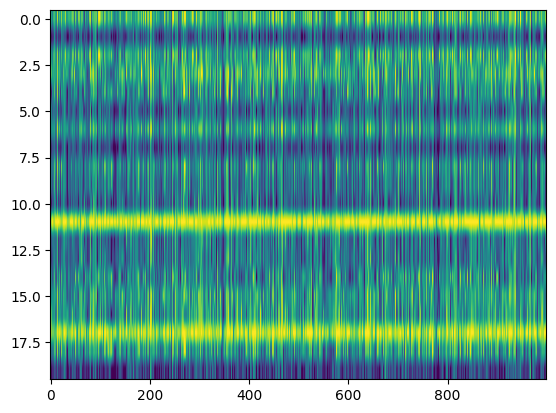

In [82]:
plt.imshow(np.abs(X),aspect='auto')

In [74]:
corrupted_data.max()

5

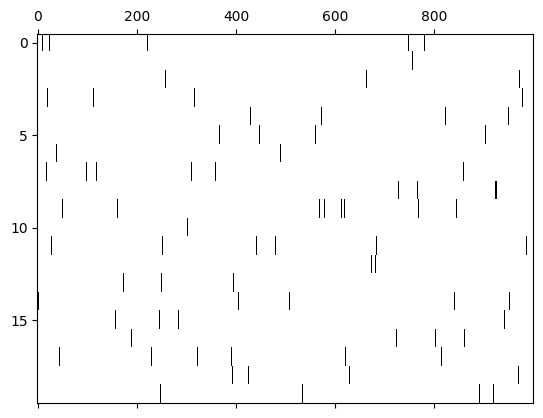

In [75]:
plt.spy(np.abs(corrupted_data-X),aspect='auto')

In [76]:
R_corrupted = corrupted_data@C@S

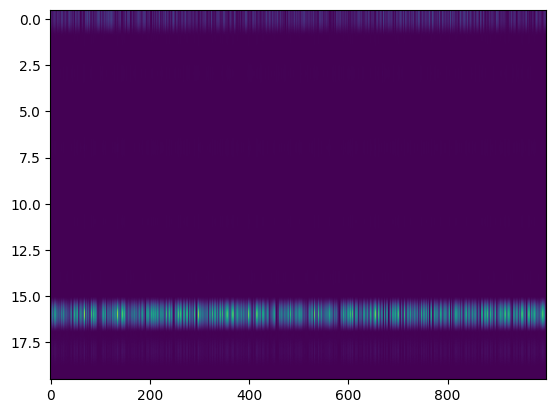

In [80]:
plt.imshow(np.abs(R-R_corrupted),aspect='auto')

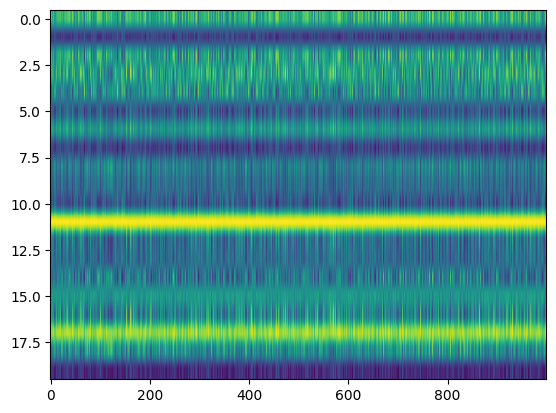

In [79]:
plt.imshow(np.abs(R_corrupted),aspect='auto')

Closing remarks:
* The other methods e.g. OAA and RBOAA also have a _compute_archetypes method which creates a result object.
* The parameters to OAA._compute archetypes are identical to that of RBOAA
* We set up a wrapper class (inside AAM.py). I will make the new changes compatible with that interface before publication - it is not critical for generating results but only helps the user experience.

In [ ]:
Loss_rboaa_complex_large = np.zeros((8,10))
Loss_oaa_complex_large = np.zeros((8,10))
Loss_tsoaa_complex_large = np.zeros((8,10))
Loss_caa_complex_large = np.zeros((8,10))

Loss_rboaa_naive_large = np.zeros((8,10))

for i in range(8):
    for j in range(10):
        Loss_rboaa_complex_large[i,j] = RBOAA_complex_large[i,j].loss[-1]
        Loss_oaa_complex_large[i,j] = OAA_complex_large[i,j].loss[-1]
        Loss_caa_complex_large[i,j] = AA_complex_large[i,j].loss[-1]
        #Loss_tsoaa_complex_large[i,j] = tsoaa_results_complex_large[i,j].loss[-1]

        #Loss_rboaa_naive_large[i,j] = rboaa_results_naive_large[i,j].loss[-1]


IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
RBOAA_complex_large[4,7].K

7

In [ ]:
RBOAA_complex_large

array([[<src.utils.AA_result_class._OAA_result object at 0x000001CD5C0A9360>,
      dtype=object)

In [ ]:
my_pallette["OAA"]

'#FFD166'

In [ ]:
Loss_rboaa_complex_large[1:,:]

array([[1.91048813, 1.91048813, 1.91048813, 1.91048813, 1.91048813,
        1.91048813, 1.91048813, 1.91048813, 1.91048813, 1.91048813],
       [1.91048813, 1.91048813, 1.91048813, 1.91048813, 1.91048813,
        1.75502861, 1.75502861, 1.75502861, 1.75502861, 1.75502861],
       [1.75502861, 1.75502861, 1.75502861, 1.75502861, 1.75502861,
        1.75502861, 1.75502861, 1.75502861, 1.75502861, 1.75502861],
       [1.74771619, 1.74771619, 1.74771619, 1.74771619, 1.74771619,
        1.74771619, 1.74771619, 1.70421886, 1.70421886, 1.70421886],
       [1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.70421886,
        1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.70421886],
       [1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.70421886,
        1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.64244413],
       [1.64244413, 1.64244413, 1.64244413, 1.64244413, 1.64244413,
        1.64244413, 1.64244413, 1.64244413, 1.64244413, 1.64244413]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


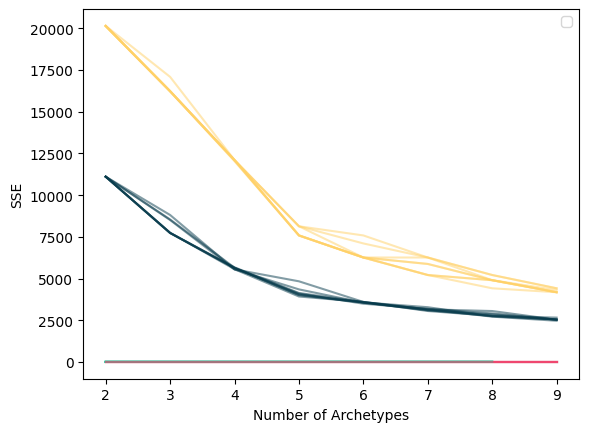

In [ ]:
fig, ax = plt.subplots()


for i in range(Loss_rboaa_complex_large.shape[0]):
    ax.plot(range(len(Loss_rboaa_complex_large[1:,:])), Loss_rboaa_complex_large[1:,i], '-',color=my_pallette["RBOAA"],alpha=0.5)
    ax.plot(range(len(Loss_oaa_complex_large)), Loss_oaa_complex_large[:,i], '-',color=my_pallette["OAA"], alpha=0.5)
    ax.plot(range(len(Loss_tsoaa_complex_large)), Loss_tsoaa_complex_large[:,i], '-',color=my_pallette["TSOAA"], alpha=0.5)
    ax.plot(range(len(Loss_caa_complex_large)), Loss_caa_complex_large[:,i], '-',color=my_pallette["AA"], alpha=0.5)


#ax.plot(range(len(Loss_rboaa_complex_large)), np.min(Loss_rboaa_complex_large,axis=1), '-',color="#ff7f0e", label='RBOAA',linewidth=3)
##ax.plot(range(len(Loss_oaa_complex_large)), np.min(Loss_oaa_complex_large,axis=1), '-',color="#2ca02c", label='OAA',linewidth=3)
#ax.plot(range(len(Loss_tsoaa_complex_large)), np.min(Loss_tsoaa_complex_large,axis=1), '-',color="#d62728", label='TSOAA',linewidth=3)
#ax.plot(range(len(Loss_caa_complex_large)), np.min(Loss_caa_complex_large,axis=1), '-',color="#1f77b4", label='CAA',linewidth=3)

ax.set_xticks(list(range(8)))
ax.set_xticklabels(list(range(2,10)))

ax.set(xlabel='Number of Archetypes', ylabel='SSE')
ax.legend()

plt.show()

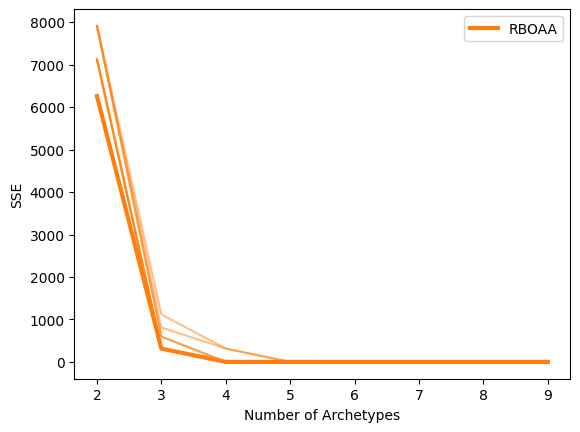

In [ ]:
fig, ax = plt.subplots()


for i in range(Loss_rboaa_complex_large.shape[0]):
    ax.plot(range(len(Loss_rboaa_naive_large)), Loss_rboaa_naive_large[:,i], '-',color="#ff7f0e",alpha=0.5)
    #ax.plot(range(len(Loss_oaa_complex_large)), Loss_oaa_complex_large[:,i], '-',color="#2ca02c", alpha=0.5)
    #ax.plot(range(len(Loss_tsoaa_complex_large)), Loss_tsoaa_complex_large[:,i], '-',color="#d62728", alpha=0.5)
    #ax.plot(range(len(Loss_caa_complex_large)), Loss_caa_complex_large[:,i], '-',color="#1f77b4", alpha=0.5)


ax.plot(range(len(Loss_rboaa_complex_large)), np.min(Loss_rboaa_naive_large,axis=1), '-',color="#ff7f0e", label='RBOAA',linewidth=3)
#ax.plot(range(len(Loss_oaa_complex_large)), np.min(Loss_oaa_complex_large,axis=1), '-',color="#2ca02c", label='OAA',linewidth=3)
#ax.plot(range(len(Loss_tsoaa_complex_large)), np.min(Loss_tsoaa_complex_large,axis=1), '-',color="#d62728", label='TSOAA',linewidth=3)
#ax.plot(range(len(Loss_caa_complex_large)), np.min(Loss_caa_complex_large,axis=1), '-',color="#1f77b4", label='CAA',linewidth=3)

ax.set_xticks(list(range(8)))
ax.set_xticklabels(list(range(2,10)))

ax.set(xlabel='Number of Archetypes', ylabel='SSE')
ax.legend()

plt.show()

In [ ]:
import itertools
K_list = list(range(2,10))

test = itertools.combinations(range(10), 2)
t = list(test)
calcIDX = np.array(t)
## Create big NMI loop
NMITSOAA = np.zeros((len(K_list),len(calcIDX)))
NMI_RBOAA_complex_large = np.zeros((len(K_list),len(calcIDX)))
NMI_OAA_complex_large = np.zeros((len(K_list),len(calcIDX)))
NMI_TSOAA_complex_large = np.zeros((len(K_list),len(calcIDX)))

for i in range(len(K_list)):
    for j in range(len(calcIDX)):
        #NMITSOAA[i,j] = calcNMI(S_save[i][calcIDX[j][0]], S_save[i][calcIDX[j][1]])
        NMI_RBOAA_complex_large[i,j] = calcNMI(rboaa_results[i,calcIDX[j][0]].A, rboaa_results[i,calcIDX[j][1]].A)
        NMI_OAA_complex_large[i,j] = calcNMI(oaa_results[i,calcIDX[j][0]].A, oaa_results[i,calcIDX[j][1]].A)
        NMI_TSOAA_complex_large[i,j] = calcNMI(tsoaa_results[i,calcIDX[j][0]].A, tsoaa_results[i,calcIDX[j][1]].A)



In [ ]:
import pandas as pd
import seaborn as sns
df1 = pd.DataFrame(NMI_TSOAA_complex_large.T, columns = K_list)
df2 = pd.DataFrame(NMI_OAA_complex_large.T, columns = K_list)
df3 = pd.DataFrame(NMI_RBOAA_complex_large.T, columns = K_list)


df1['Method'] = 'TSOAA'
df2['Method'] = 'OAA'
df3['Method'] = 'RBOAA'


df1 = df1.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')
df2 = df2.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')
df3 = df3.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')

df = pd.concat([df1,df2,df3])

#df = df1 

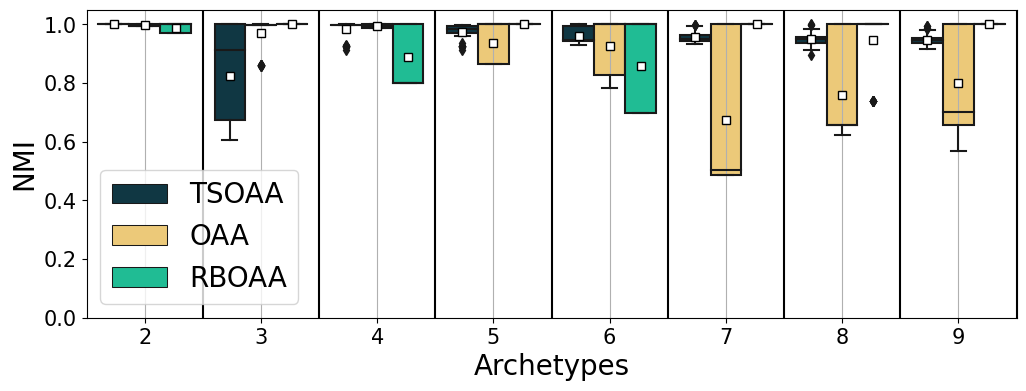

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (12,4))

ax = sns.boxplot(x='Archetypes', y="NMI", hue="Method", showmeans=True, data=df,palette=my_pallette,meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})

#ax.axvline(linewidth=2, color='r')
ax.xaxis.grid(True, which='major')
[ax.axvline(x+.5,color='k') for x in ax.get_xticks()]
ax.set_ylabel("NMI", size=20)
ax.set_ylim([0,1.05])
ax.set_xlabel("Archetypes", size=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=20)
plt.show()

In [ ]:
list(range(2,11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
rboaa_results[i,calcIDX[j][0]].A

IndexError: index 8 is out of bounds for axis 0 with size 8

In [ ]:
i

8